In [54]:
conda install -c conda-forge pandoc


error: incomplete escape \U at position 28

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\Pollo\Downloads\Assessment Social Media Data.xlsx")

df.head()

,Platform,SubType,ID,AuthorUserName,AuthorDisplayName,AuthorId,Date,Caption,Content Type,Links,Impressions,PostReach,Video Views,Engagements,LikeCount,Comments,Shares/Retweets,TotalEngagementsAndInteractions,TotalInteractions,EngagementRate
0,Facebook,Facebook_Post,92774416228_880125136817230,NaN,Baltimore Ravens,92774416228,2023-10-22 12:00:00,"Hey you, it's GAMEDAY at the BANK â—ï¸",Photo,NaN,86569,79747.0,0.0,2511,1183,70,778,4096,1585,0.0290
1,Twitter,Twitter_Tweet,1716061847349305668,Ravens,Baltimore Ravens,22146282,2023-10-22 12:00:00,"Hey you, it's GAMEDAY at the BANK â—ï¸ https...",Photo,https://twitter.com/Ravens/status/171606184734...,104511,NaN,NaN,2662,2230,45,387,3509,847,0.0255
2,Instagram,Instagram_Media,18291041254124259,ravens,Baltimore Ravens,17841400255423620,2023-10-22 12:00:00,"Hey you, it's GAMEDAY at the BANK â—ï¸",Photo,NaN,196702,164100.0,NaN,35314,29129,350,0,35314,0,0.1795
3,Twitter,Twitter_Tweet,1716070407730495648,Ravens,Baltimore Ravens,22146282,2023-10-22 12:34:00,ðŸ‘€ https://t.co/JMuiD9Fp2p,Video,https://twitter.com/Ravens/status/171607040773...,77988,NaN,24895.0,1416,1261,40,115,3947,2531,0.0182
4,Twitter,Twitter_Tweet,1716084494128853126,Ravens,Baltimore Ravens,22146282,2023-10-22 13:30:00,"How to watch, listen and livestream Ravens vs....",Text,https://www.baltimoreravens.com/news/watch-lis...,34182,NaN,NaN,176,150,4,22,709,533,0.0052


## Step 1: The final cleaned data set should include the below fields. Please convert the current file field names into the following:
- Source -> Platform
- Created -> Date
- Message -> Caption
- ContentType -> Content Type
- PostImpressions(Total) -> Impressions
- TotalPublicEngagements -> Engagements
- VideoViews -> Video Views

In [4]:
df = df.rename(columns={'Source': 'Platform',
                        'Created': 'Date',
                        'Message': 'Caption',
                        'ContentType': 'Content Type',
                       'PostImpressions(Total)': 'Impressions',
                       'TotalPublicEngagements': 'Engagements',
                       'VideoViews': 'Video Views'})

df.head()

,Platform,SubType,ID,AuthorUserName,AuthorDisplayName,AuthorId,Date,Caption,Content Type,Links,Impressions,PostReach,Video Views,Engagements,LikeCount,Comments,Shares/Retweets,TotalEngagementsAndInteractions,TotalInteractions,EngagementRate
0,Facebook,Facebook_Post,92774416228_880125136817230,NaN,Baltimore Ravens,92774416228,2023-10-22 12:00:00,"Hey you, it's GAMEDAY at the BANK â—ï¸",Photo,NaN,86569,79747.0,0.0,2511,1183,70,778,4096,1585,0.0290
1,Twitter,Twitter_Tweet,1716061847349305668,Ravens,Baltimore Ravens,22146282,2023-10-22 12:00:00,"Hey you, it's GAMEDAY at the BANK â—ï¸ https...",Photo,https://twitter.com/Ravens/status/171606184734...,104511,NaN,NaN,2662,2230,45,387,3509,847,0.0255
2,Instagram,Instagram_Media,18291041254124259,ravens,Baltimore Ravens,17841400255423620,2023-10-22 12:00:00,"Hey you, it's GAMEDAY at the BANK â—ï¸",Photo,NaN,196702,164100.0,NaN,35314,29129,350,0,35314,0,0.1795
3,Twitter,Twitter_Tweet,1716070407730495648,Ravens,Baltimore Ravens,22146282,2023-10-22 12:34:00,ðŸ‘€ https://t.co/JMuiD9Fp2p,Video,https://twitter.com/Ravens/status/171607040773...,77988,NaN,24895.0,1416,1261,40,115,3947,2531,0.0182
4,Twitter,Twitter_Tweet,1716084494128853126,Ravens,Baltimore Ravens,22146282,2023-10-22 13:30:00,"How to watch, listen and livestream Ravens vs....",Text,https://www.baltimoreravens.com/news/watch-lis...,34182,NaN,NaN,176,150,4,22,709,533,0.0052


In [5]:
df.to_excel(r"C:\Users\Pollo\Downloads\Assessment Social Media Data.xlsx", index=False)

## Step 2: Please utilize your cleaned data set to answer the following questions:

### 1. What is the impressions average of Twitter videos?

In [8]:
avg_impressions = df[(df['Platform'] == 'Twitter') & 
                (df['Content Type'].str.contains('video', case=False, na=False))]['Impressions'].mean()

print('Average impressions of Twitter videos is', round(avg_impressions))

Average impressions of Twitter videos is 174448


### 2. Of the top 10 posts with the most engagement, which one had the highest impressions?

In [10]:
top_10 = df.sort_values(by='Impressions', ascending=False).head(10)

In [11]:
result = top_10[['Impressions', 
                 'Platform', 
                 'SubType', 
                 'Content Type', 
                 'ID', 
                 'Caption']]

result

,Impressions,Platform,SubType,Content Type,ID,Caption
7,3360820,Twitter,Twitter_Tweet,Video,1716099564510261728,.@Lj_era8 lock in â€¼ï¸ https://t.co/sVYkJrARwy
106,1835931,Facebook,Facebook_Post,Photo,92774416228_881916039971473,"The clock's run out, time's up, overâ—"
118,1823334,Twitter,Twitter_Tweet,Photo,1716189699755127097,you sure about that? https://t.co/fVj51fJzIl
60,1072094,Twitter,Twitter_Tweet,Video,1716148777155690727,We love a fullback first down ðŸ˜‚\n\n@PRic508...
85,931705,Instagram,Instagram_Reel,Video,18267817303092869,Ball So Hard University!!
133,782236,Instagram,Instagram_Reel,Video,18007026749073262,@kingjames showed love to @mandrews on #Nation...
38,673766,Twitter,Twitter_Tweet,Video,1716140024964476982,TOUCHDOWN @Lj_era8 ON FOURTH DOWN!!!!\n\nTune ...
89,643579,Instagram,Instagram_Reel,Video,18022641082754313,The Gus Bus ROLLS for 80 yds â€¼ï¸
14,640666,Facebook,Facebook_Post,Photo,92774416228_881792843317126,You know Mark Andrews is ready for National Ti...
52,613216,Instagram,Instagram_Reel,Video,17969539850491085,Thought @nelsonagholor_15 was going in the sta...


### 3. Plot the average engagements and impressions by each platform.

In [13]:
platform_averages = df.groupby('Platform')[['Impressions', 'Engagements']].mean()

print(platform_averages.round())

           Impressions  Engagements
Platform                           
Facebook      151141.0       2964.0
Instagram     361159.0      42740.0
Twitter       175766.0       2168.0


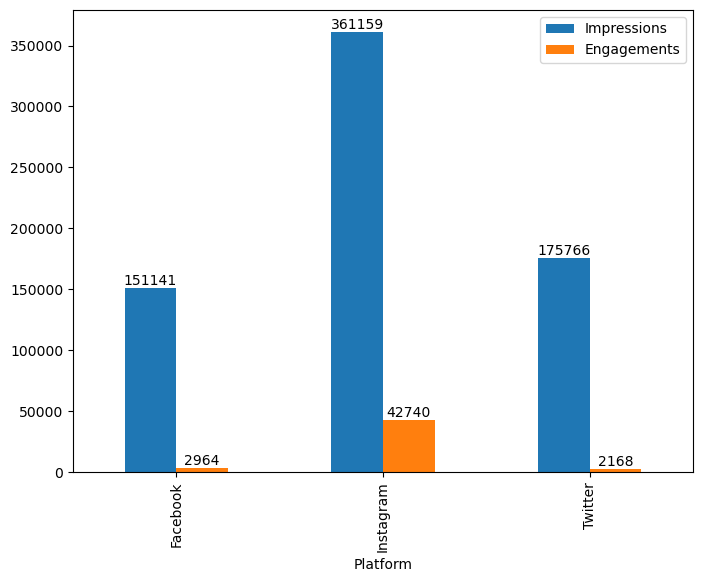

In [14]:
ax = platform_averages.plot(kind='bar', figsize=(8,6))

for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=0)

### 4. The social team would like you to come up with 3-5 insights/recommendations for their gameday post. Feel free to provide any visuals to support your findings.

#### The following code is analyzing the average Engagement Rate and average Total Engagement and Interactions count for each Content Type (photo, video, or text)

In [17]:
content_type_analysis = df.groupby('Content Type').agg({
    'EngagementRate': 'mean',
    'TotalEngagementsAndInteractions': 'mean'
}).sort_values(by='EngagementRate', ascending=False)

content_type_analysis['EngagementRate'] = (
    (content_type_analysis['EngagementRate'] * 100).round(2).astype(str) + ' %'
)
content_type_analysis['TotalEngagementsAndInteractions'] = (
    content_type_analysis['TotalEngagementsAndInteractions'].round(0).astype(int)
)

content_type_analysis

,EngagementRate,TotalEngagementsAndInteractions
Content Type,,
Photo,5.23 %,16338
Video,2.38 %,10896
Text,0.96 %,1340


#### This is an analysis of the updated column name for Video Views to show that we can access the column and assess user viewership across each Platform's SubType post. We can see that Instagram Reels receive significantly more video views that the other Subtypes.

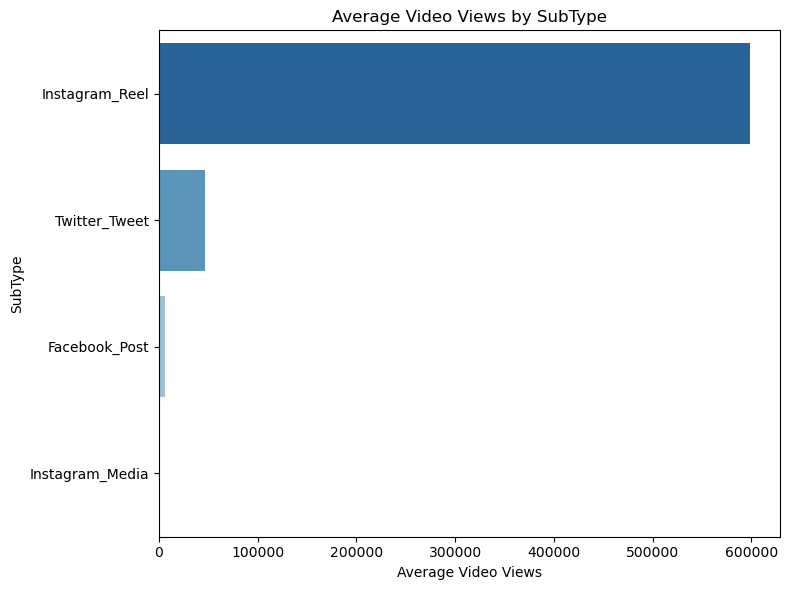

In [19]:
video_df = df[df['Video Views'].notnull()]
video_views_by_subtype = video_df.groupby('SubType')['Video Views'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=video_views_by_subtype.values, 
            y=video_views_by_subtype.index, 
            hue=video_views_by_subtype.index, 
            palette='Blues_r', 
            legend=False)
plt.title('Average Video Views by SubType')
plt.ylabel('SubType')
plt.xlabel('Average Video Views')
plt.tight_layout()
plt.show()

In [20]:
video_views_by_subtype.round(0).astype(int).map('{:,}'.format)

SubType
Instagram_Reel     598,920
Twitter_Tweet       46,834
Facebook_Post        6,260
Instagram_Media          0
Name: Video Views, dtype: object

#### The following code is determing which hour has the best average Engagement Rate and average Total Engagements and Interactions count. 

#### Aside from morning/noon posts, we can see increases during hour 17 (5pm), which is the ending time of 1pm games, and hour 20 (8pm), which is the start time of 8pm primetime games.

In [22]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hour'] = df['Date'].dt.hour

hourly_engagement = df.groupby('Hour').agg({
    'EngagementRate': 'mean',
    'TotalEngagementsAndInteractions': 'mean'
})

hourly_plot = hourly_engagement.copy()
hourly_plot['EngagementRate'] = (
    hourly_plot['EngagementRate'] * 100).round(2)
hourly_plot['TotalEngagementsAndInteractions'] = hourly_plot['TotalEngagementsAndInteractions'].round(0)

hourly_display = hourly_plot.copy()
hourly_display['EngagementRate'] = (
    hourly_display['EngagementRate'].astype(str) + ' %'
)
hourly_display['TotalEngagementsAndInteractions'] = (
    hourly_display['TotalEngagementsAndInteractions'].astype(int).map('{:,}'.format)
)

hourly_display

,EngagementRate,TotalEngagementsAndInteractions
Hour,,
0,6.19 %,"25,476"
12,6.3 %,"11,716"
13,0.52 %,"1,940"
14,1.04 %,"13,556"
15,1.86 %,"2,898"
16,2.36 %,"4,553"
17,4.79 %,"13,819"
18,2.59 %,"9,351"
19,3.57 %,"11,043"


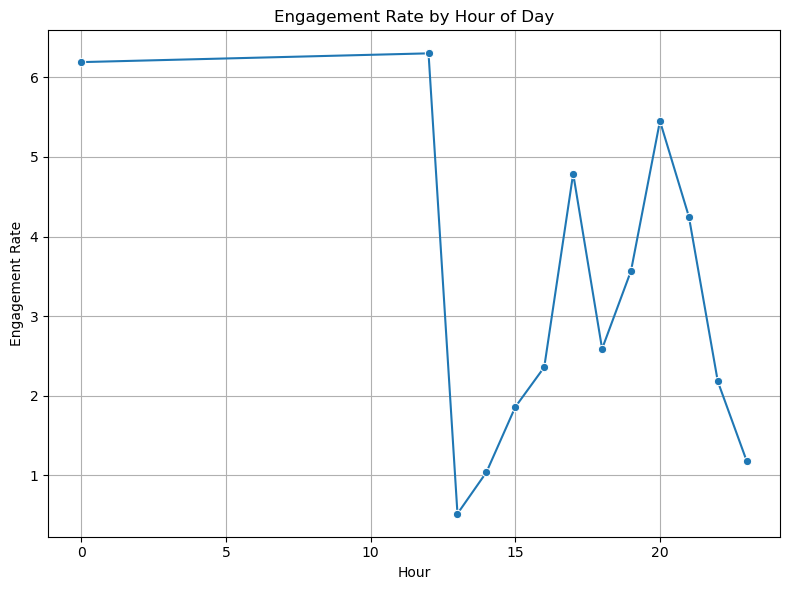

In [23]:
plt.figure(figsize=(8, 6))
sns.lineplot(data = hourly_plot.reset_index(), 
             x='Hour', 
             y='EngagementRate', 
             marker='o')
plt.title('Engagement Rate by Hour of Day')
plt.ylabel('Engagement Rate')
plt.xlabel('Hour')
plt.grid(True)
plt.tight_layout()
plt.show()

#### For this code, the column 'LikeRate' was created by dividing 'LikeCount' by 'Impressions' to get a percentage of how often users are liking the posts they're coming across. We can see that Twitter and Facebook performance is way behind Instagram's like rate on posts.

In [25]:
df['LikeRate'] = df['LikeCount'] / df['Impressions']

like_rate_analysis = df.groupby(['Platform', 'SubType']).agg({
    'LikeRate': 'mean',
    'Impressions': 'mean',
    'LikeCount': 'mean'
}).sort_values(by='LikeRate', ascending=False)

like_rate_analysis['LikeRate'] = (
    (like_rate_analysis['LikeRate'] * 100).round(2).astype(str) + ' %'
)
like_rate_analysis['Impressions'] = (
    like_rate_analysis['Impressions'].round().astype(int).map('{:,}'.format)
)
like_rate_analysis['LikeCount'] = (
    like_rate_analysis['LikeCount'].round().astype(int).map('{:,}'.format)
)

like_rate_analysis.head(10)

LikeRate Impressions LikeCount
Platform  SubType                                       
Instagram Instagram_Media  13.89 %     249,271    36,859
          Instagram_Reel    6.33 %     598,920    38,075
Twitter   Twitter_Tweet     1.54 %     175,766     1,870
Facebook  Facebook_Post     1.26 %     151,141     1,720

#### Another column was created to determine whether a post has an attached link. A visual was created to display the large increase in average Engagement Rate for posts that don't contain a link.

In [27]:
df['HasLinks'] = df['Links'].notnull()

links_analysis = df.groupby('HasLinks').agg({
    'EngagementRate': 'mean',
    'Impressions': 'mean',
    'TotalEngagementsAndInteractions': 'mean'
})

links_plot = links_analysis.copy()
links_plot['EngagementRate'] = (
    links_plot['EngagementRate'] * 100).round(2)
links_plot['Impressions'] = links_plot['Impressions'].round(0)
links_plot['TotalEngagementsAndInteractions'] = (
    links_plot['TotalEngagementsAndInteractions'].round(0)
)

links_display = links_plot.copy()
links_display['EngagementRate'] = (
    links_display['EngagementRate'].astype(str) + ' %'
)
links_display['Impressions'] = (
    links_display['Impressions'].astype(int).map('{:,}'.format)
)
links_display['TotalEngagementsAndInteractions'] = (
    links_display['TotalEngagementsAndInteractions'].astype(int).map('{:,}'.format)
)

links_display

,EngagementRate,Impressions,TotalEngagementsAndInteractions
HasLinks,,,
False,5.7 %,"221,891","20,279"
True,1.77 %,"177,565","6,041"


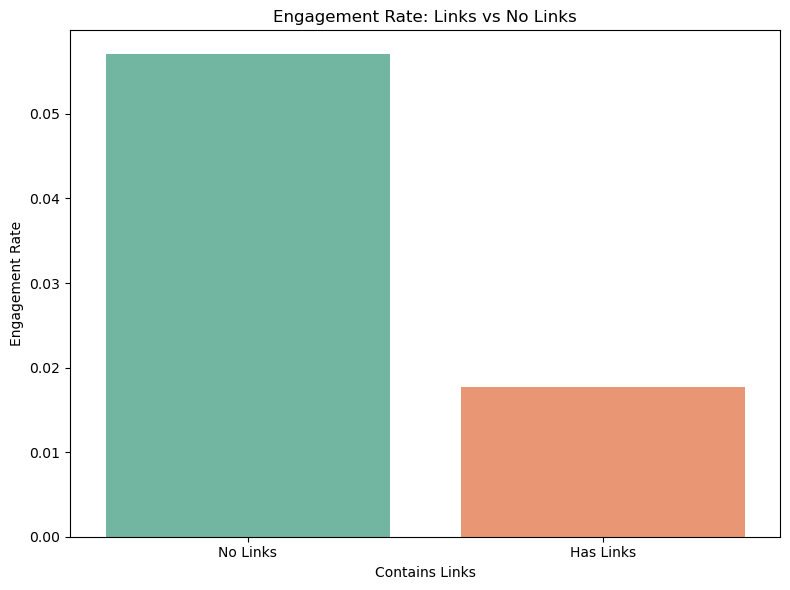

In [28]:
plt.figure(figsize=(8, 6))
sns.barplot(data=links_analysis.reset_index(), 
            x='HasLinks', 
            y='EngagementRate', 
            hue='HasLinks', 
            palette='Set2', 
            legend=False)
plt.title('Engagement Rate: Links vs No Links')
plt.ylabel('Engagement Rate')
plt.xlabel('Contains Links')
plt.xticks([0, 1], ['No Links', 'Has Links'])
plt.tight_layout()
plt.show()